In [3]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
print(tf.__version__)

2.4.1


In [12]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

画像は28x28のNumPy配列から構成されている。それぞれのピクセルの値は0から255の間の整数である。ラベルは0から9までの配列となっており、数字が下記の表のように衣料品のクラスに対応している。

|  Label  |  Class  |  
|  ---  |  --  |  
|  0  |  T-shirt/top  |
|  1  |  Trouser  |
|  2  |  Pullover  |
|  3  |  Dress  |
|  4  |  Coat  |
|  5  |  Sandal  |
|  6  |  Shirt  |
|  7  |  Sneaker  |
|  8  |  Bag  |
|  9  |  Ankle boot  |

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pllover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [9]:
train_images.shape

(60000, 28, 28)

In [13]:
len(train_labels)

60000

## データの前処理  
ネットワークを訓練する前にデータを前処理する必要がある。最初の画像のようにピクセルの値は0から255の間の数値となっている。

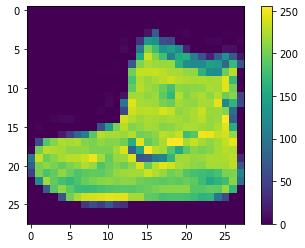

In [16]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

ニューラルネットワークにデータを投入する前にこれらの値を0から1までの範囲に正規化する。

In [17]:
train_images = train_images / 255.0
test_images = test_images / 255.0

訓練用データセットの最初の25枚の画像をクラス名付きで表示する。

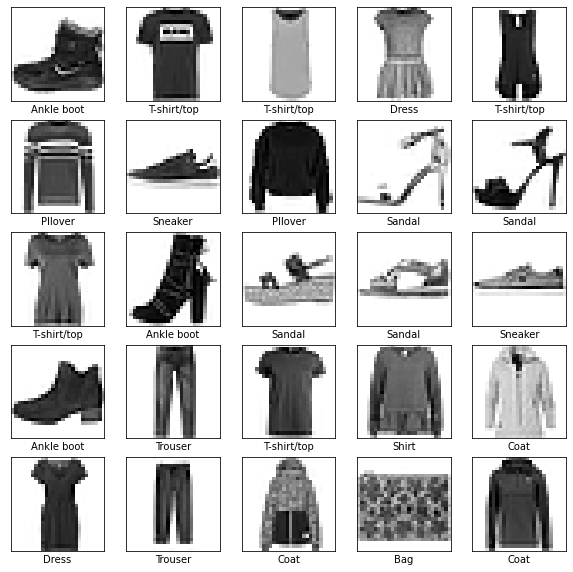

In [18]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[trains_labels[i]])
plt.show()

## モデルの構築  
ニューラルネットワークを構築するにはまず、モデルの階層を定義し、その後モデルをコンパイルする。
### 層の設定  
ニューラルネットワークを形作る基本的な構成要素はレイヤである。レイヤとは、入力されたデータから「表現」を抽出する。それらの「表現」は今取り組もうとしている問題に対して、より「意味のある」ものであることが期待される。  
ディープラーニングモデルのほとんどは単純なレイヤの積み重ねで構成されている。各レイヤには訓練中に学習されるパラメータが存在している。

In [22]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

`tf.keras.layers.Flatten`では画像を28x28ピクセルの2次元配列から1x784ピクセルの1次元配列に変換する。  
このレイヤが画像の中に積まれているピクセルの行を取り崩し、横に並べる。  

#### モデルのコンパイル  
モデルが訓練できるようになるには、いくつかの設定を追加する必要がある。それらの設定はモデルのコンパイル時に追加される。　　

- 損失関数(loss function)：訓練中のモデルが不正確であるほど大きな値となる関数である。この関数の値を最小化することにより、訓練中のモデルを正しい方向に向かわせようとする。
- オプティマイザ(optimizer)：モデルが見ているデータと、損失関数の値から、どのようにモデルを更新するかを決定する。
- メトリクス(metrics)：訓練とテストのステップを監視するのに使用する。下記の例ではaccuracyを使用している。

In [23]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [24]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6284 - accuracy: 0.7824
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3850 - accuracy: 0.8613
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3433 - accuracy: 0.8750
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3099 - accuracy: 0.8877
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2990 - accuracy: 0.8909


In [25]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3472 - accuracy: 0.8756

Test accuracy: 0.8755999803543091


In [26]:
predictions = model.predict(test_images)

In [29]:
np.argmax(predictions[0])

9

In [30]:
test_labels[0]

9